In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import tensorflow as tf
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Check shape
train.shape, test.shape

((42000, 785), (28000, 784))

In [4]:
# Split label of train
target = train['label'].astype('float32')
train = train.drop('label', axis=1).astype('int32')
test = test.astype('float32')

target.shape, train.shape, test.shape

((42000,), (42000, 784), (28000, 784))

In [5]:
# Train-validation splitting
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((33600, 784), (8400, 784), (33600,), (8400,))

# Machine Learning

## Logistics Regression

In [6]:
# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Save model
joblib.dump(log_reg, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [8]:
# Predict and score
y_pred = log_reg.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 91.83%


> With the simplest Logistics Regression model, we got a quite good accuracy: 91.83%

## KNN

In [9]:
# Train model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Save model
joblib.dump(knn_model, 'knn_model.joblib')

['knn_model.joblib']

In [11]:
# Make predictions on val set
y_pred = knn_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 96.67%


> With the non-linear KNN model, we got a better accuracy: 96.67%

# Deep Learning

## CNN

In [12]:
# Preprocess: Convert to 28x28 pixels array & normalization
X_train = train.values.reshape((train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = test.values.reshape((test.shape[0], 28, 28, 1)).astype('float32') / 255

X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [13]:
# One Hot Encoding to label
y_train = tf.keras.utils.to_categorical(target, 10)

y_train.shape

(42000, 10)

In [14]:
# Train-validation splitting
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

In [15]:
# Define layers 
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [16]:
# Compile and train 
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1182/1182 [==============================] - 15s 12ms/step - loss: 0.1483 - accuracy: 0.9554 - val_loss: 0.0638 - val_accuracy: 0.9781
Epoch 2/10
1182/1182 [==============================] - 16s 13ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0513 - val_accuracy: 0.9824
Epoch 3/10
1182/1182 [==============================] - 16s 14ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0418 - val_accuracy: 0.9871
Epoch 4/10
1182/1182 [==============================] - 16s 13ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0417 - val_accuracy: 0.9881
Epoch 5/10
1182/1182 [==============================] - 15s 13ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0619 - val_accuracy: 0.9833
Epoch 6/10
1182/1182 [==============================] - 15s 13ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0487 - val_accuracy: 0.9871
Epoch 7/10
1182/1182 [==============================] - 16s 13ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0699 -

In [17]:
# Save CNN model
joblib.dump(model, 'cnn_model.joblib')

['cnn_model.joblib']

> Here the accuracy for using CNN is 98.74%.

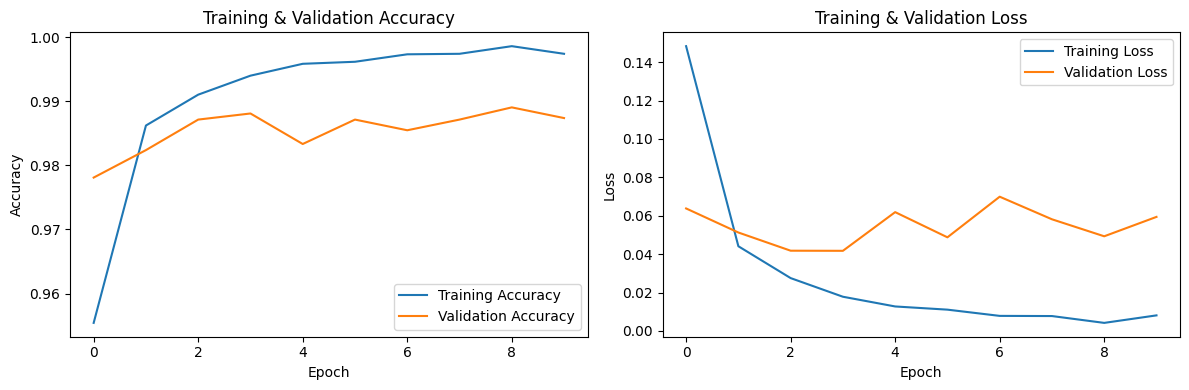

In [21]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Predict and select the result with maximum probability
results = model.predict(X_test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')

results

875/875 [==============================] - 4s 4ms/step


0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

# Conclusion

1/1 [==============================] - 0s 30ms/step
Predicted value: 6


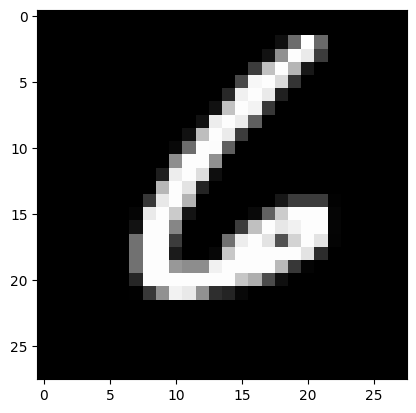

In [20]:
# Test and show image result
ran_num = rd.randrange(len(X_test))
plt.imshow(X_test[ran_num].reshape(28, 28), cmap='gray')

y_pred = model.predict(X_test[ran_num].reshape(1, 28, 28, 1))
print(f'Predicted value: {np.argmax(y_pred)}')

> We have comparison for Accuracy:
> 1. (Baseline) Logistics Regression: 91.83%
> 2. KNN: 96.67%
> 3. CNN: 98.74%